In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from ripser import ripser

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf') 

In [2]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)


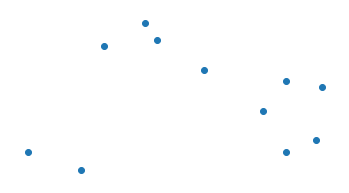

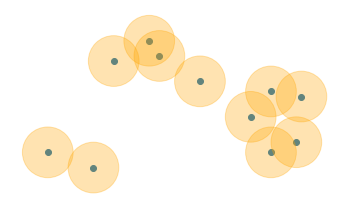

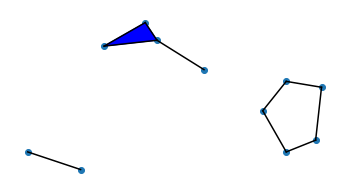

In [3]:

fig = plt.figure()
ax = fig.add_subplot(111)

'''num_points = 10
a_pol,b_pol = np.random.uniform(low=3.0,high=4.0,size=(num_points,1)),np.random.uniform(low=0,high=2*np.pi,size=(num_points,1))

a,b = pol2cart(a_pol,b_pol)
'''

a = np.zeros((11,1))
b = np.zeros((11,1))

b[:3] = np.array([[0.65,.62,.61]]).T
a[:3] = np.array([[0.45,.47,.38]]).T

b[3:9] = np.array([[0.5,.54,.45,.57,.55,.43]]).T
a[3:9] = np.array([[.65,.75,.74,.55,.69,.69]]).T

b[9:] = np.array([[0.43,.40]]).T
a[9:] = np.array([[.25,.34]]).T


num_points = len(a)

ax.scatter(a,b)

plt.axis("off")
ax.set_aspect(1.0)
plt.savefig("../figures/dots.pdf",format="pdf")




fig = plt.figure()
ax = fig.add_subplot(111)

eps = .1

plt.axis("off")


for i in np.arange(num_points):
    c = plt.Circle((a[i], b[i]), radius=eps/2, color='orange', alpha=.3)
    ax.add_patch(c)

ax.scatter(a,b)

ax.set_aspect(1.0)

plt.savefig("../figures/circles.pdf",format="pdf")


fig = plt.figure()
ax = fig.add_subplot(111)


plt.axis("off")

ax.scatter(a,b)


ab = np.hstack((a,b))
D = scipy.spatial.distance.cdist(ab,ab)

for i in np.arange(num_points):
    for j in np.arange(i):
        if D[i,j] < eps:
            ax.plot([a[i],a[j]],[b[i],b[j]],color="black")
            
for i in np.arange(num_points):
    for j in np.arange(i):
        for k in np.arange(j):
            if D[i,j] < eps and D[i,k] < eps and D[j,k] < eps:
                ax.fill([a[i],a[j],a[k]],[b[i],b[j],b[k]],color="blue")

ax.set_aspect(1.0)

plt.savefig("../figures/simplicial_complex.pdf",format="pdf")


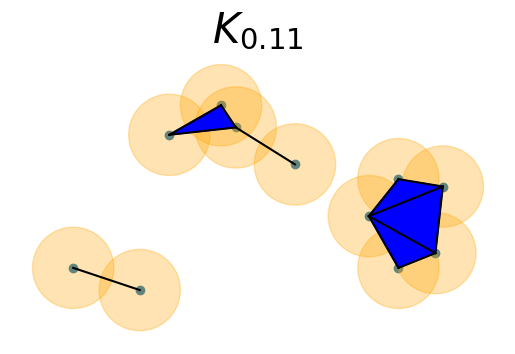

In [39]:
a = np.zeros((11,1))
b = np.zeros((11,1))

b[:3] = np.array([[0.65,.62,.61]]).T
a[:3] = np.array([[0.45,.47,.38]]).T

b[3:9] = np.array([[0.5,.54,.45,.57,.55,.43]]).T
a[3:9] = np.array([[.65,.75,.74,.55,.69,.69]]).T

b[9:] = np.array([[0.43,.40]]).T
a[9:] = np.array([[.25,.34]]).T


num_points = len(a)

eps = .11

fig = plt.figure()
ax = fig.add_subplot(111)

plt.axis("off")

for i in np.arange(num_points):
    c = plt.Circle((a[i], b[i]), radius=eps/2, color='orange', alpha=.3)
    ax.add_patch(c)

ax.scatter(a,b)

ab = np.hstack((a,b))
D = scipy.spatial.distance.cdist(ab,ab)

for i in np.arange(num_points):
    for j in np.arange(i):
        if D[i,j] < eps:
            ax.plot([a[i],a[j]],[b[i],b[j]],color="black")
            
for i in np.arange(num_points):
    for j in np.arange(i):
        for k in np.arange(j):
            if D[i,j] < eps and D[i,k] < eps and D[j,k] < eps:
                ax.fill([a[i],a[j],a[k]],[b[i],b[j],b[k]],color="blue")

ax.set_aspect(1.0)

ax.set_title("$K_{"+str(round(eps,2))+"}$",fontsize=30)

plt.savefig("../figures/simplicial_complex_eps_"+str(round(100*eps)).zfill(2)+".pdf",format="pdf")



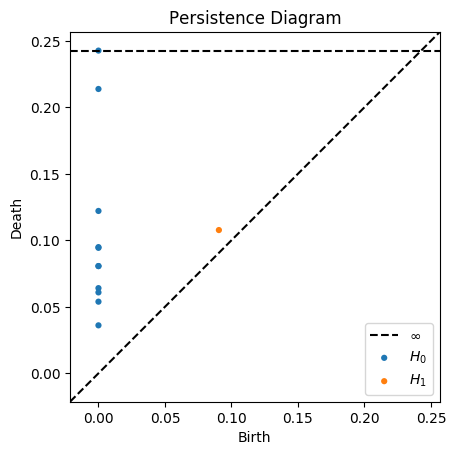

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

dgms = ripser(np.hstack((a,b)))['dgms']
persim.plot_diagrams(dgms,ax=ax)

ax.set_title("Persistence Diagram")

plt.savefig("../figures/PD.pdf",format="pdf")

In [36]:
dgms

[array([[0.        , 0.03605551],
        [0.        , 0.05385165],
        [0.        , 0.06082762],
        [0.        , 0.06403124],
        [0.        , 0.08062258],
        [0.        , 0.08062258],
        [0.        , 0.09433981],
        [0.        , 0.09486833],
        [0.        , 0.12206556],
        [0.        , 0.21377559],
        [0.        ,        inf]]), array([[0.09055385, 0.1077033 ]])]